Noviembre 2017 ejercicio 9

Determínese el valor mínimo de la relación X=W0/WPL , las masas iniciales de cada etapa, las masas de cada escalón y las masas de propulsante en cada uno de ellos para dicho valor mínimo, de un vehículo de tres etapas, cuya misión sería situar en órbita circular de altitud 375km, una carga de pago de 1,350kg, en un lanzamiento hacia el Este desde una base situada en el Ecuador Terrestre. Las relaciones estructurales de los escalones primero, segundo y tercero son iguales a 0,17 y los propulsantes tienen impulsos específicos de 265, 285 y 315s respectivamente. Error permitido en el valor de la velocidad orbital <1m/s

Considérese:
- Pérdidas de velocidad por gravedad y resistencia aerodinámica 1.800m/s. 
- velocidad de rotación de la Tierra ωT = 7,2722e-5 rad/s.
- Radio de la Tierra = 6.370km.
- Constante gravitacional de la Tierra μ= 398600,4418km3/s2,
- g0 = 9,81m/s2.

In [3]:
#primero importamos
import numpy as np
#importar numpy para calculo numérico
from sympy import *
#importar sympy para calculo simbolico
init_printing(use_latex=True)
#importar optimize para resolver numericamente 
from scipy import optimize

In [8]:
R=6370000 #en metros
wt=7.2722e-5
mu=398600.4418e9

Vloss=1950
h=375000

Isp1=265
Isp2=285
Isp3=315

mpl=1350

o1=0.17
o2=0.17
o3=0.17

g0=9.81

In [10]:
#Ecuaciones para obtener Vi de lanzamiento

Vorb=(mu/(R+h))**0.5
Vrot=wt*R
Vi=Vorb-Vrot+Vloss
Vi

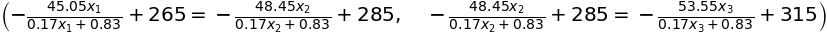

In [11]:
#Ecauciones que relacionan las etapas
f1=Eq(Isp1*(1-o1*(x1/(o1*x1+(1-o1)))),Isp2*(1-o2*(x2/(o2*x2+(1-o2)))))

f2=Eq(Isp2*(1-o2*(x2/(o2*x2+(1-o2)))),Isp3*(1-o3*(x3/(o3*x3+(1-o3)))))


f1,f2

In [12]:
#hayamos relaciones entre las x
#el output de un solve es una lista de symbols, por eso debo guardar un elemento en una nueva variable
x2sol = solve(f1,x2)
x3sol = solve(f2,x3)
x2=x2sol[0]
x3=x3sol[0]
x3 = x3.subs('x2',x2)

x2,x3

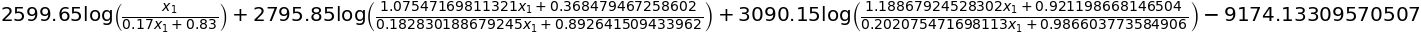

In [13]:
#definimos la ecuación de Vi (puesta para iteral)
f3=g0*(Isp1*log(x1/(o1*x1+(1-o1)))+Isp2*log(x2/(o2*x2+(1-o2)))+Isp3*log(x3/(o3*x3+(1-o3))))-Vi
f3

In [14]:
#preparamos f3 para resolver numericamente
f3sol=lambdify(x1,f3)

In [15]:
#resolvemos iterando para x1
x1= optimize.newton(f3sol,1)


In [16]:
#print de soluciones y calculo de masas

#sustituyo el valor numerico de x1
x2=x2.subs('x1',x1)
x3=x3.subs('x1',x1)

X = x1*x2*x3

m03=mpl*x3
m02=m03*x2
m01=m02*x1

m1=m01-m02
m2=m02-m03
m3=m03-mpl

mp1=m1*(1-o1)
mp2=m2*(1-o2)
mp3=m3*(1-o3)



print('x1=',x1,'   ','x2=',x2,'   ','x3=',x3,'   ')
print('X=',X)
print('m01=',m01,'kg','   ','m02=',m02,'kg','   ','m03=',m03,'kg')
print('m1=',m1,'kg','    ','m2=',m2,'kg','    ','m3=',m3,'kg')
print('mp1=',mp1,'kg','   ','mp2=',mp2,'kg','    ','mp3=',mp3,'kg')

x1= 4.135515027569537     x2= 4.81610883653150     x3= 5.83699954997445    
X= 116.256048097854
m01= 156945.664932102 kg     m02= 37950.6939004741 kg     m03= 7879.94939246550 kg
m1= 118994.971031628 kg      m2= 30070.7445080086 kg      m3= 6529.94939246550 kg
mp1= 98765.8259562514 kg     mp2= 24958.7179416472 kg      mp3= 5419.85799574637 kg
